# NN for Regression - Boston dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [4]:
df0 = pd.read_csv('Boston.csv')
df0[:5]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
# convert to numpy array

In [6]:
df = df0.values

In [7]:
X = df[:,0:13]
y = df[:,13]

In [8]:
# Reserve test set for performance evaluation

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,
                                                    random_state = 7)

## Scale the features

In [10]:
scaler = StandardScaler()
scaler.fit(X_train);

In [11]:
Xtrain_trans = scaler.transform(X_train)
Xtest_trans = scaler.transform(X_test)

In [12]:
Xtrain_trans.shape

(404, 13)

In [13]:
Xtest_trans.shape

(102, 13)

## Model

In [14]:
# Two hidden layers with 64 nodes

In [15]:
# try 10 epochs showing the results per epoch (verbose=1)

In [16]:
# for regression output layer with one node, always

In [17]:
model = Sequential()
model.add(Dense(64, activation='relu',input_shape = (13,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))                      
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.fit(Xtrain_trans,y_train,epochs = 10,batch_size=1)

Epoch 1/10
404/404 [==============================] - 1s 2ms/step - loss: 152.0236 - mae: 8.9455
Epoch 2/10
404/404 [==============================] - 0s 990us/step - loss: 19.2692 - mae: 3.0492
Epoch 3/10
404/404 [==============================] - 0s 987us/step - loss: 15.0400 - mae: 2.6431
Epoch 4/10
404/404 [==============================] - 0s 1ms/step - loss: 13.0485 - mae: 2.5032
Epoch 5/10
404/404 [==============================] - 0s 984us/step - loss: 12.7976 - mae: 2.4066
Epoch 6/10
404/404 [==============================] - 0s 991us/step - loss: 11.9931 - mae: 2.3732
Epoch 7/10
404/404 [==============================] - 0s 984us/step - loss: 11.1256 - mae: 2.2956
Epoch 8/10
404/404 [==============================] - 0s 989us/step - loss: 10.8542 - mae: 2.2415
Epoch 9/10
404/404 [==============================] - 0s 988us/step - loss: 10.0512 - mae: 2.2008
Epoch 10/10
404/404 [==============================] - 0s 1000us/step - loss: 10.3524 - mae: 2.1690


In [18]:
# try 50 epochs with no output (verbose = 0), wait 60 seconds

In [19]:
model = Sequential()
model.add(Dense(64, activation='relu',input_shape = (13,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))                      
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.fit(Xtrain_trans,y_train,epochs = 50,batch_size=1,verbose=0)

In [20]:
model.evaluate(Xtest_trans,y_test,verbose = 0)

[24.311828281365187, 2.8974058628082275]

In [21]:
# Test [MSE,MAE]

### 4-Fold Cross validation -customized

In [22]:
def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu',input_shape = (13,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))                      
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [23]:
# use 4 folds

In [24]:
k = 4
n = len(Xtrain_trans) // k        # floor (round) division
n

101

In [25]:
# n is number of data rows (samples) in each fold

In [26]:
all_scores = []

In [27]:
# try epochs = 50 (takes 90 secs. approx)

In [28]:
for i in range(k):
    print('processing fold #',i)
    
    # Select ith fold test set
    X_val = Xtrain_trans[i * n:(i+1) * n]
    y_val = y_train[i * n:(i+1) * n]

    # Create ith fold train set
    X_fold = np.concatenate([Xtrain_trans[:i*n], Xtrain_trans[(i+1)*n:]],axis=0)
    y_fold = np.concatenate([y_train[:i*n], y_train[(i+1) * n:]],axis=0)

    model = build_model()    
    # Train ith fold
    model.fit(X_fold, y_fold, epochs=50,batch_size=1,verbose=0)
    
    # Test ith fold
    val_mse, val_mae = model.evaluate(X_val,y_val,verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [29]:
# MAE scores per fold

In [30]:
all_scores

[2.376941680908203, 2.7662277221679688, 2.0410594940185547, 2.0303351879119873]

In [31]:
np.mean(all_scores)

2.3036410212516785

In [32]:
# On avg we are off by 2390 usd

### Tuning the number of epochs

In [33]:
# memory clean-up

In [34]:
from keras import backend as K

In [35]:
K.clear_session()

In [36]:
# Let use 100 epochs

In [37]:
# we will slightly modify the for loop to record MAE values after each epoch

In [38]:
all_mae_histories = []

In [39]:
# this will take 2 mins

In [40]:
for i in range(k):
    print('processing fold #', i)
    
    X_val = Xtrain_trans[i * n: (i + 1) * n]
    y_val = y_train[i * n: (i + 1) * n]
    
    X_fold = np.concatenate([Xtrain_trans[:i * n], 
                                         Xtrain_trans[(i + 1) * n:]],axis=0)
    y_fold = np.concatenate([y_train[:i * n], y_train[(i + 1) * n:]],axis=0)
    
    model = build_model()    
    output = model.fit(X_fold, y_fold, validation_data=(X_val,y_val)
                       ,epochs=150, batch_size=1, verbose=0)
    mae_history = output.history['val_mae']    # or val_mae
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [41]:
len(all_mae_histories)

4

In [42]:
len(all_mae_histories[0])

150

In [43]:
# a list of 4 lists, each with 150 values

In [44]:
aux = np.vstack(all_mae_histories).T

In [45]:
aux[:5]

array([[4.24428225, 4.72332287, 4.9736166 , 4.07174969],
       [3.20357299, 3.57763863, 3.53530335, 3.18468714],
       [2.51935434, 3.24701476, 3.17666888, 2.80911636],
       [2.65501642, 3.13064933, 2.84161353, 2.57029438],
       [2.31487679, 3.23249292, 2.85785818, 2.68386769]])

In [46]:
aux.shape

(150, 4)

In [47]:
# rows are epochs

In [48]:
aux2 = pd.DataFrame(aux,columns = ['fold1','fold2','fold3','fold4'])
aux2[:5]

,fold1,fold2,fold3,fold4
0,4.244282,4.723323,4.973617,4.071750
1,3.203573,3.577639,3.535303,3.184687
2,2.519354,3.247015,3.176669,2.809116
3,2.655016,3.130649,2.841614,2.570294
4,2.314877,3.232493,2.857858,2.683868


In [49]:
aux2[-5:]

,fold1,fold2,fold3,fold4
145,2.538969,2.960959,2.296530,2.266644
146,2.589100,3.008468,2.406464,2.341807
147,2.898743,2.876539,2.518916,2.463704
148,2.320696,2.824012,2.423615,2.484261
149,2.430152,2.811558,2.262587,2.448529


In [50]:
# find average MAEs per epoch

In [51]:
aux3 = aux2.copy()

In [52]:
aux3['means']=aux3.mean(axis = 1)
aux3[:5]

,fold1,fold2,fold3,fold4,means
0,4.244282,4.723323,4.973617,4.071750,4.503243
1,3.203573,3.577639,3.535303,3.184687,3.375301
2,2.519354,3.247015,3.176669,2.809116,2.938039
3,2.655016,3.130649,2.841614,2.570294,2.799393
4,2.314877,3.232493,2.857858,2.683868,2.772274


In [53]:
means = aux2.mean(axis = 1)

In [54]:
# plot MAE vs epoch

In [55]:
xaxis = range(1,151)

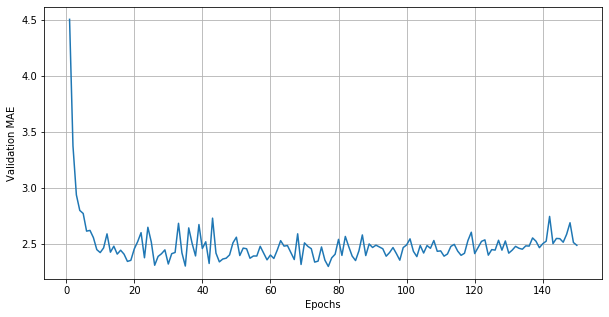

In [56]:
plt.figure(figsize=(10,5))
plt.plot(xaxis,means)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.grid()

In [57]:
# Use moving average to smooth the curve

In [58]:
mavg = means.rolling(10).mean()

In [59]:
mavg[:15]

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     2.905434
10    2.701630
11    2.623127
12    2.572022
13    2.540115
14    2.503879
dtype: float64

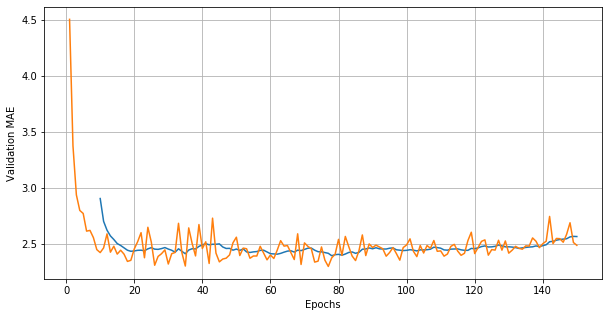

In [60]:
plt.figure(figsize=(10,5))
plt.plot(xaxis,mavg)
plt.plot(xaxis,means)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.grid()

In [61]:
# plot Moving average only

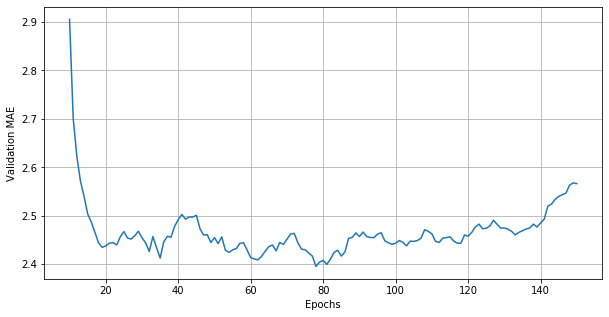

In [62]:
plt.figure(figsize=(10,5))
plt.plot(xaxis,mavg)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.grid()

In [63]:
# NN starts overfitting after 35 epochs

In [64]:
# Train a model on all training data, then test it on test data

In [65]:
model = build_model()
model.fit(Xtrain_trans, y_train, epochs=30, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(Xtest_trans, y_test)

102/102 [==============================] - 0s 222us/step


In [66]:
test_mae_score

3.063857078552246

In [67]:
# predictions are off by about 3000 usd